In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from functools import reduce

 Exercise 0.1: Plotting
 In this exercise, you will get familiar with numpy.array and the matplotlib package.
 Plotting the function f(x) = x2 for x ∈ [−1,1].
 a) Create a numpy array X of evenly distributed points in [−1,1]. For example,
 X =[−1.,−0.9,−0.8,...,1.]
 b) Create a numpy array Y of f(xi) with point xi from the array X we created.
 c) Plot the function. Hint: matplotlib.pyplot.plot
 Now, we repeat the same procedure but considering f(x) = e−x for x ∈ [0,10].
 d) Repeat step (a)-(c)
 e) Plot now the Y in log scale. Hint: matplotlib.pyplot.semilogy
 Suppose in additional to the data Y , we also have the standard deviation ∆Y to the data
 resulting from some random error,
 f) Create a numpyarray∆Y andputinsomesmallrandomnumbers. Hint: numpy.random.rand
 g) Repeat the steps before, but plot the errorbar ∆Y with the data Y.
 Hint: matplotlib.pyplot.errorbar

In [26]:
x = np.linspace(-1.0,1.0,21)
x

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

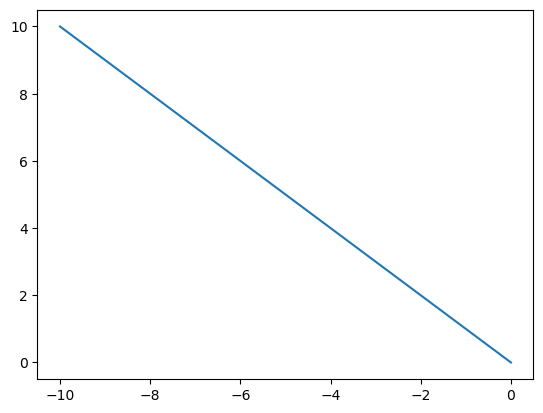

In [28]:
a=np.linspace(0,10,50)
b = np.log(np.exp(-a))
grap2 = plt.plot(b,a)
y = x**2
fun2 = np.exp(-a)

In [5]:
y

array([1.  , 0.81, 0.64, 0.49, 0.36, 0.25, 0.16, 0.09, 0.04, 0.01, 0.  ,
       0.01, 0.04, 0.09, 0.16, 0.25, 0.36, 0.49, 0.64, 0.81, 1.  ])

In [6]:
fun2

NameError: name 'fun2' is not defined

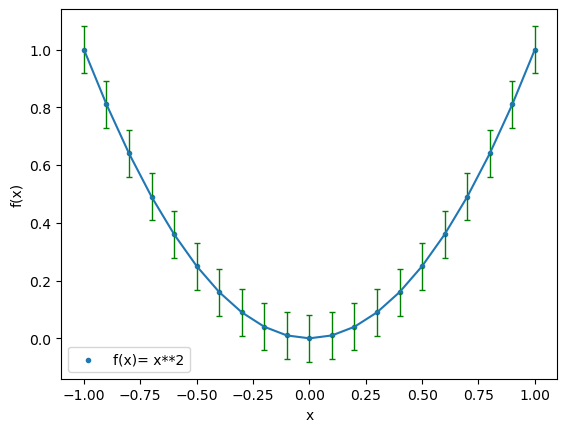

In [52]:
plt.figure()
plt.scatter(x,y, label = "f(x)= x**2", marker = '.')
plt.errorbar(x,y, yerr= 0.25*np.std(y), capsize=2,ecolor= 'green',elinewidth= 1, )
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

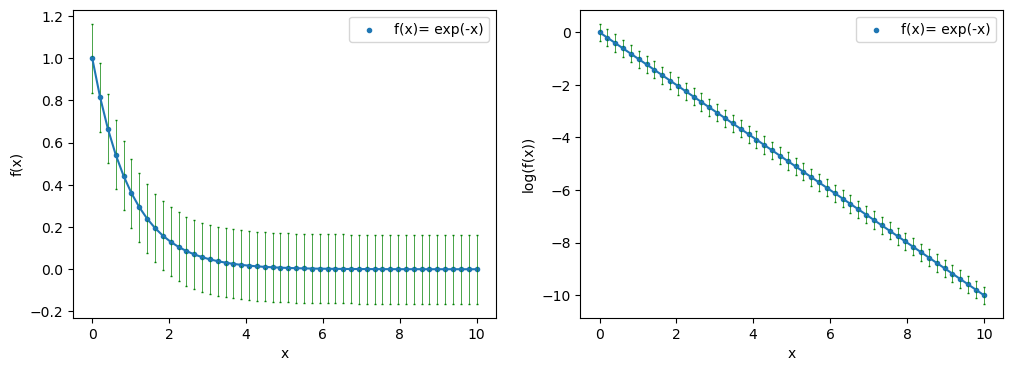

In [77]:
fig, axes = plt.subplots(1, 2, figsize = (12,4), sharex=True)
axes[0].scatter(a,np.exp(-a), label = "f(x)= exp(-x)", marker = '.')
axes[0].errorbar(a,np.exp(-a), yerr= 0.5*np.std(y), capsize=1,ecolor= 'green',elinewidth= 0.5, )
axes[0].set_xlabel("x")
axes[0].set_ylabel("f(x)")
axes[0].legend()



axes[1].scatter(a,b, label = "f(x)= exp(-x)", marker = '.')
axes[1].errorbar(a,b, yerr= np.std(y), capsize=1,ecolor= 'green',elinewidth= 0.5, )
axes[1].set_xlabel("x")
axes[1].set_ylabel("log(f(x))")
axes[1].legend()

plt.show()

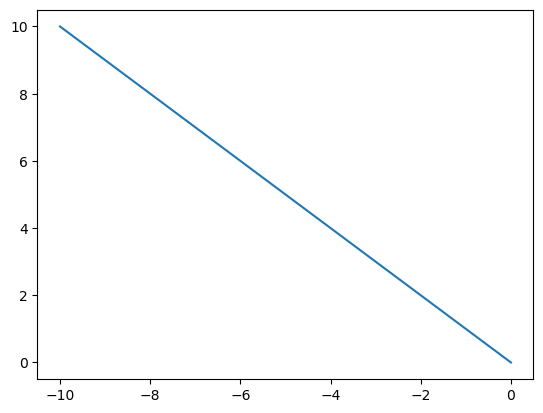

In [8]:
a=np.linspace(0,10,50)
b = np.log(np.exp(-a))
grap2 = plt.plot(b,a)

In [9]:
fun2er

NameError: name 'fun2er' is not defined

In [10]:
plt.figure()
plt.scatter(a, fun2, label="f(x) = exp(-x)")
plt.errorbar(a,fun2, yerr= 0.5*np.std(fun2), fmt='o', capsize=1,ecolor= 'green',elinewidth= 1, )
plt.xlabel("x")

plt.ylabel("f(x)")
plt.legend()
plt.show()

NameError: name 'fun2' is not defined

<Figure size 640x480 with 0 Axes>

In [78]:

fun2er= fun2 + 0.05*np.random.rand(len(fun2))

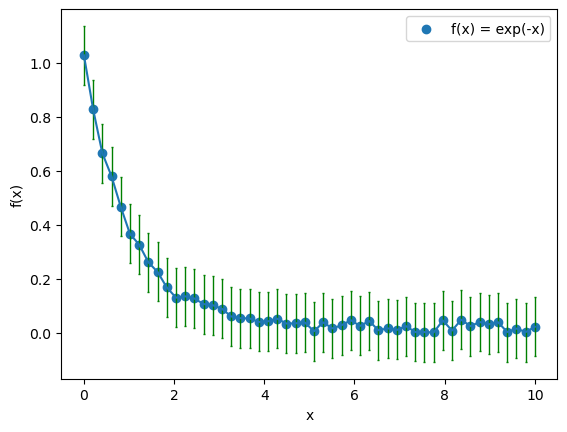

In [82]:
plt.figure()
plt.scatter(a, fun2er, label="f(x) = exp(-x)", marker ='o')
plt.errorbar(a,fun2er, yerr= 0.5*np.std(fun2er),  capsize=1,ecolor= 'green',elinewidth= 1, )
plt.xlabel("x")

plt.ylabel("f(x)")
plt.legend()
plt.show()


 Exercise 0.2: Numerical linear algebra methods
 
 In this exercise, you will get familiar with numpy.array and numpy.linalg package.
 Consider the Heisenberg model of two spins,
 $$
 H = 
 σα
 1σα
 2 = σx
 1 ⊗ σx
 2 + σy
 1 ⊗ σy
 2 + σz
 1 ⊗ σz
 2 ,
 α=x,y,z
 $$
 
 where the Pauli matrices are given as
 $$
 σx = 0 1
 1 0 , σy= 0 −i
 i
 0 , σz= 1 0
 0 −1 
 $$

 a) Construct the Pauli matrices as numpy arrays.
 
 b) Construct the Hamiltonian of the Heisenberg model as a numpy array.
 
 c) Diagonalize the Hamiltonian. What are the eigenvalues and eigenstates?
 Hint: numpy.linalg.eigh
 
 d) Construct the operator for the total magnetization in z direction
 $
 M =σz
 1 ⊗12+11⊗σz
 2,
 $
 
 and compute its expectation value and variance ⟨M2⟩ − ⟨M⟩2 for for the ground
 state of H as well as the state
 $
 1
  √
 2
 (|↑↑⟩ + |↓↓⟩).
 $
 
 e) Optional: How would you generalize your code from part b)-d) to more than two
 spins with the same nearest-neighbor Heisenberg interaction?
 

In [84]:
sigx = np.array([[0.,1.],[1.,0.]])
sigy =np.array([[0.,-1.j],[1.j,0.]])
sigz = np.array([[1.,0.],[0.,-1.]])

In [85]:
H = np.kron(sigx, sigx)+np.kron(sigy, sigy)+ np.kron(sigz,sigz)
sp.Matrix(H)


Matrix([
[1.0,    0,    0,   0],
[  0, -1.0,  2.0,   0],
[  0,  2.0, -1.0,   0],
[  0,    0,    0, 1.0]])

In [86]:
eiv = np.linalg.eigh(H)
(eiv)

EighResult(eigenvalues=array([-3.,  1.,  1.,  1.]), eigenvectors=array([[ 0.        +0.j,  1.        +0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.70710678+0.j,  0.        +0.j,  0.70710678+0.j,
         0.        +0.j],
       [-0.70710678+0.j,  0.        +0.j,  0.70710678+0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         1.        +0.j]]))

In [87]:
sp.Matrix(np.matrix(eiv[1]))

Matrix([
[                 0, 1.0,                 0,   0],
[ 0.707106781186547,   0, 0.707106781186547,   0],
[-0.707106781186547,   0, 0.707106781186547,   0],
[                 0,   0,                 0, 1.0]])

In [88]:
Hd = np.diag(eiv[0])
Ph = eiv[1]

In [89]:
M = np.kron(sigz,np.eye(2))+ np.kron(np.eye(2), sigz)
sp.Matrix(M)

Matrix([
[2.0, 0.0, 0.0,  0.0],
[0.0, 0.0, 0.0,  0.0],
[0.0, 0.0, 0.0,  0.0],
[0.0, 0.0, 0.0, -2.0]])

In [90]:
b0 = np.mat([1,0])
b1 = np.mat([0,1])

In [91]:
np.kron(b0,b0)

matrix([[1, 0, 0, 0]])

In [105]:
psi0_N0 = [np.kron(b0,bo) for bo in b0_list[1:]
psi0_N1=  [np.kron(b1,bi) for bi in b1_list]
psi0_N

[matrix([[1, 0, 0, 0]]),
 matrix([[1, 0, 0, 0]]),
 matrix([[0, 0, 0, 1]]),
 matrix([[0, 0, 0, 1]])]

In [103]:
L=2
b0_list = [b0]*L
b1_list = [b1]*L

In [100]:
L=2
b0_list = [b0]*L
b1_list = [b1]*L
for bo,bi in b0_list[1:],b1_list[1:]:
    psi0_N = np.kron(b0,bo)+np.kron(b1,bi)

psi0_N

ValueError: not enough values to unpack (expected 2, got 1)

In [121]:
L= int(input('number of spins in the chain'))

number of spins in the chain 2


In [122]:

b0 = np.mat([1,0])
b1 = np.mat([0,1])
b0_list = [b0]*L
b1_list = [b1]*L
for bo in b0_list[1:]:
    psi0n = np.kron(b0,bo)
for bi in b1_list[1:]:
    psi1n = np.kron(b1,bi)

psifull = psi0n+psi1n
psifull

matrix([[1, 0, 0, 1]])

In [123]:
b0_list = [b0]*L
b1_list = [b1]*L
psi0 = ((np.kron(b0,b0_list[(i+1)%L]) + np.kron(b1,b1_list[(i+1)%L]))for i in range(L) )/np.sqrt(2)
psi0

TypeError: unsupported operand type(s) for /: 'generator' and 'float'

In [93]:
rho0 = np.outer(psi0, np.conj(psi0).T)

In [94]:
rho0

array([[0.5, 0. , 0. , 0.5],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0.5, 0. , 0. , 0.5]])

In [96]:
Mexp= np.trace(np.matmul(M,rho0))
M2 = np.matmul(M.conj().T,M )
M2exp= np.trace(np.matmul(M2,rho0))
print('expectation value of M',Mexp,'expectation value of M^2', M2exp)

expectation value of M 0.0 expectation value of M^2 3.999999999999999


In [25]:
Mexp, M2exp

(0.0, 3.999999999999999)

e) Optional: How would you generalize your code from part b)-d) to more than two spins with the same nearest-neighbor Heisenberg interaction?

In [27]:
sn = int(input('number of spins'))

number of spins 2


In [28]:

Hn1 = []
Hn2=[]
Hn3 = []
for n in range(sn-1):
    Hn1 = np.kron(Hn1,sigx)
    Hn2 = np.kron(Hn2,sigy)
    Hn3 = np.kron(Hn3,sigz)
    

Hn = Hn1+Hn2+Hn3
eivn = np.linalg.eigh(Hn)
Hnd =np.diag(eivn[0])
Phn = eivn[1]


In [34]:
sp.Matrix(Hn)

Matrix([
[1.0,    0,    0,   0],
[  0, -1.0,  2.0,   0],
[  0,  2.0, -1.0,   0],
[  0,    0,    0, 1.0]])

In [30]:
def n_tensor_prod(mat,n):
    return reduce(np.kron,[mat]*n)

In [31]:
a = n_tensor_prod(sigz,1)
sp.Matrix(a)

Matrix([
[1,  0],
[0, -1]])

In [32]:
n=2
I = np.eye(2)
for i in range(1,n-1):
    op1,opiz,opi,opi_1 = I,None,None,None
   
    op1 = n_tensor_prod(I,(i-1))
    opiz = sigz
    opi=np.kron(op1,opiz)
    
    opi_1=n_tensor_prod(I,n-i)
    
    M+= np.kron(opiz,opi_1)

M

array([[ 2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -2.]])

In [33]:
z =np.zeros((2,2))
np.kron(sigz,z)

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0., -0., -0.],
       [ 0.,  0., -0., -0.]])

$$
hamiltonian
$$

In [8]:
from scipy import sparse
H= sparse.csr_matrix((2**L,2**L))
sp.Matrix(H.toarray())

Matrix([
[0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0]])

In [6]:
import numpy as np
import scipy
from scipy import sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt
import sympy as sp

Id = sparse.csr_matrix(np.eye(2))
Sx = sparse.csr_matrix([[0., 1.], [1., 0.]])
Sz = sparse.csr_matrix([[1., 0.], [0.,-1.]])
sy = sparse.csr_matrix([[0.,-1.j],[1.j,0.]])
Splus = sparse.csr_matrix([[0., 1.], [0., 0.]])
Sminus = sparse.csr_matrix([[0., 0.], [1., 0.]])

def Hsig_to_full(op, i, L):
    op_list = [Id]*L # = [Id, Id, Id ...] with L entries
    op_list[i] = op
    op_list[(i+1)%L] =op
    full = op_list[0]
   # final_op = []
    for op_i in op_list[1:]:
        full = sparse.kron(full, op_i, format="csr")
     #   final_op.append(full)
    return full

def gen_ham(L):
    H= sparse.csr_matrix((2**L,2**L))
    for j in range(L):
        H+=-t*(Hsig_to_full(Sx,j,L)+Hsig_to_full(sy,j,L)+Hsig_to_full(Sz,j,L))

    return H



In [9]:
t=1
L=2
testham = gen_ham(2) * (1/L)
sp.Matrix(testham.toarray())

Matrix([
[-1.0,    0,    0,    0],
[   0,  1.0, -2.0,    0],
[   0, -2.0,  1.0,    0],
[   0,    0,    0, -1.0]])

$$ Magnetization$$

In [17]:
def singesite_to_full(op, i, L):
    op_list = [Id]*L # = [Id, Id, Id ...] with L entries
    op_list[i] = op
    full = op_list[0]
   
    for op_i in op_list[1:]:
        full = sparse.kron(full, op_i, format="csr")
    
    return full

def gen_sy_list(L):
    return [singesite_to_full(sy,i,L) for i in range(L)]
    
def gen_sx_list(L):
    return [singesite_to_full(Sx, i, L) for i in range(L)]

def gen_sz_list(L):
    return [singesite_to_full(Sz, i, L) for i in range(L)]


        

In [24]:
L =2
magnet = sum(gen_sz_list(L))
sp.Matrix(magnet.toarray())

Matrix([
[2.0, 0.0, 0.0,  0.0],
[0.0, 0.0, 0.0,  0.0],
[0.0, 0.0, 0.0,  0.0],
[0.0, 0.0, 0.0, -2.0]])

N-spin state